In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')http://localhost:8888/notebooks/codenation/coestatistica-1/desafio_semana3.ipynb#

In [46]:
# importação dos dados
df = pd.read_csv('desafio1.csv')

In [47]:
# dimensões do dataframe
df.shape

(7000, 12)

In [48]:
# colunas do dataframe
df.columns

Index(['RowNumber', 'id', 'sobrenome', 'pontuacao_credito',
       'estado_residencia', 'genero', 'idade', 'nivel_estabilidade',
       'saldo_conta', 'numero_produtos', 'possui_cartao_de_credito',
       'membro_ativo'],
      dtype='object')

In [49]:
# dataframe
df.head(5)

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [50]:
# Informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 7000 non-null   int64  
 1   id                        7000 non-null   object 
 2   sobrenome                 7000 non-null   object 
 3   pontuacao_credito         7000 non-null   int64  
 4   estado_residencia         7000 non-null   object 
 5   genero                    7000 non-null   object 
 6   idade                     7000 non-null   int64  
 7   nivel_estabilidade        7000 non-null   int64  
 8   saldo_conta               7000 non-null   float64
 9   numero_produtos           7000 non-null   int64  
 10  possui_cartao_de_credito  7000 non-null   int64  
 11  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB


In [51]:
# dados faltantes em todo dataset
df.isna().sum()

RowNumber                   0
id                          0
sobrenome                   0
pontuacao_credito           0
estado_residencia           0
genero                      0
idade                       0
nivel_estabilidade          0
saldo_conta                 0
numero_produtos             0
possui_cartao_de_credito    0
membro_ativo                0
dtype: int64

In [52]:
# Colunas do dataframe
df.columns

Index(['RowNumber', 'id', 'sobrenome', 'pontuacao_credito',
       'estado_residencia', 'genero', 'idade', 'nivel_estabilidade',
       'saldo_conta', 'numero_produtos', 'possui_cartao_de_credito',
       'membro_ativo'],
      dtype='object')

In [53]:
# tipos de dados
df.dtypes

RowNumber                     int64
id                           object
sobrenome                    object
pontuacao_credito             int64
estado_residencia            object
genero                       object
idade                         int64
nivel_estabilidade            int64
saldo_conta                 float64
numero_produtos               int64
possui_cartao_de_credito      int64
membro_ativo                  int64
dtype: object

#### Existe correlação forte positiva entre pontuação de credito e saldo da conta ?

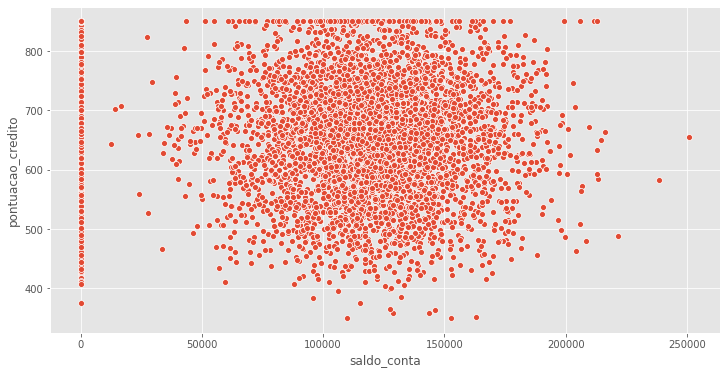

In [54]:
# grafico de dispersão
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'saldo_conta', y = 'pontuacao_credito', data = df)

RESP: Não há correlação entre as variaveis, talvez porque o saldos sejam volatios (mudam constantemente)

In [55]:
df[['saldo_conta','pontuacao_credito']].corr()

,saldo_conta,pontuacao_credito
saldo_conta,1.000000,0.009761
pontuacao_credito,0.009761,1.000000


# Grafíco de correlação

In [56]:
features_corr = ['RowNumber',
                 'id',
                 'sobrenome',
                 'pontuacao_credito',
                 'estado_residencia',
                 'genero',
                 'idade',
                 'nivel_estabilidade',
                 'saldo_conta',
                 'numero_produtos', 
                 'possui_cartao_de_credito',
                 'membro_ativo']

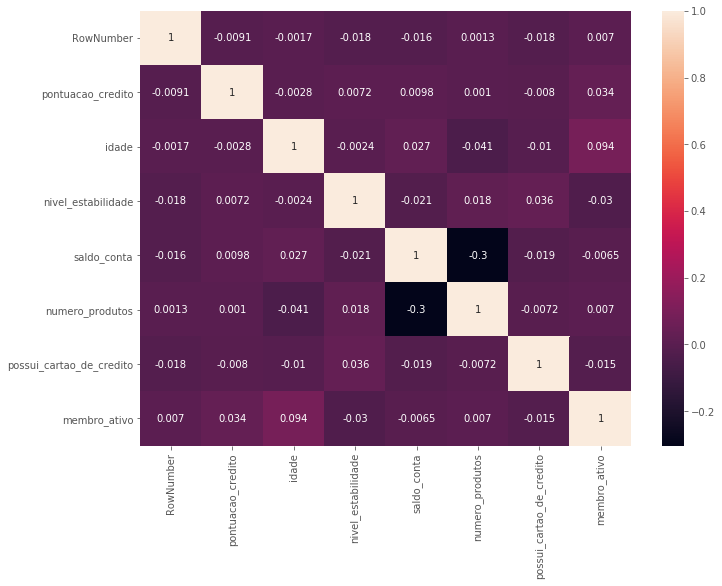

In [58]:
# Grafíco de Correlação
corr = df[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,annot=True, annot_kws={"size": 10})

In [38]:
# Trocando o nome da coluna RowNumber para numero_linha
df.rename(columns = {'RowNumber' : 'numero_linha'}, inplace = True)

In [39]:
# Estados de residencia de clientes
df.estado_residencia.unique()

array(['SC', 'RS', 'PR'], dtype=object)

In [40]:
# Clientes por estado
df.estado_residencia.value_counts()

SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

In [41]:
# criando as listas auxiliares
estado = list(df['estado_residencia'].unique())
res = list()

# loop para fazer os calculos por estado em sequencia SC, PR, RS
for estado in estado:
    aux = df[df['estado_residencia'] == estado]
    res.append(aux['pontuacao_credito'].value_counts().idxmax())
    res.append(aux['pontuacao_credito'].median())
    res.append(aux['pontuacao_credito'].mean())
    res.append(aux['pontuacao_credito'].std())

In [42]:
# salvando tudo em um dicionario
resposta = {"SC": {"moda": res[0], "mediana": res[1], "media": res[2], "desvio_padrao": res[3]}, 
               "RS": {"moda": res[4], "mediana": res[5], "media": res[6], "desvio_padrao": res[7]}, 
               "PR": {"moda": res[8], "mediana": res[9], "media": res[10],"desvio_padrao": res[11]}}

In [43]:
# criando um novo dataframe com moda, mediana, media e desvio padrão 
df_resp = pd.DataFrame(data=resposta)
print(f'TABELA POR ESTADO\n{df_resp}')
df_resp.to_json('submission.json', orient='columns')

TABELA POR ESTADO
                       SC          RS          PR
moda           850.000000  850.000000  850.000000
mediana        653.000000  650.000000  650.000000
media          649.537653  651.105143  648.961294
desvio_padrao   97.233493   95.136598   98.607186
